# Import the necessary packages for reading, exploring and cleaning the data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Read the training dataset and print out the first 5 rows to see what the data looks like. we can also use .sample() method.
# Here "Survived" column is the target feature. "0" means the person didn't survive and "1" means that they did.

data = pd.read_csv('train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# .describe() method is a nice handy command to see and understand the numerical data
# We see that we have 891 rows of data. However in the age column we only have values for 714 people. We have missing data here

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for missing/null values 

In [4]:
# Check the null values in each columns and print out how many are missing in each of them.
# In the training dataset, we have 177 (~20%) missing values for age column, 687 missing for Cabin, and 2 for port embarked  

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualizing data 

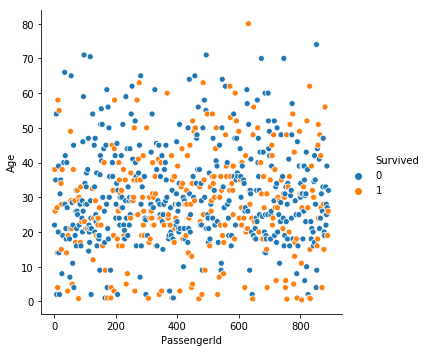

In [5]:
# Scatterplots are great for checking any outstanding patterns in the data
# One has to be careful though, often it is a combination of factors that result in a distinction in your data
# So don't form your final judgements on correlations based on few visualizations

# Here I'm checking to see whether age has something to do with survival
# We can't say anything definitive about the relation between age and survial here

sns.relplot(x='PassengerId', y='Age', hue='Survived', data=data)

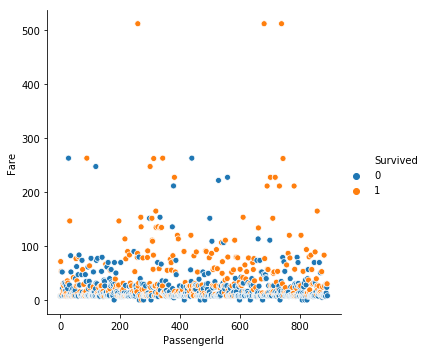

In [6]:
# Here I'm checking for any relation between ticket price and Survival
# It ties with the Passenger Class
# We can say that people who paid higher ticket prices did better in surviving the sinking of the ship

sns.relplot(x='PassengerId', y='Fare', hue='Survived', data=data)

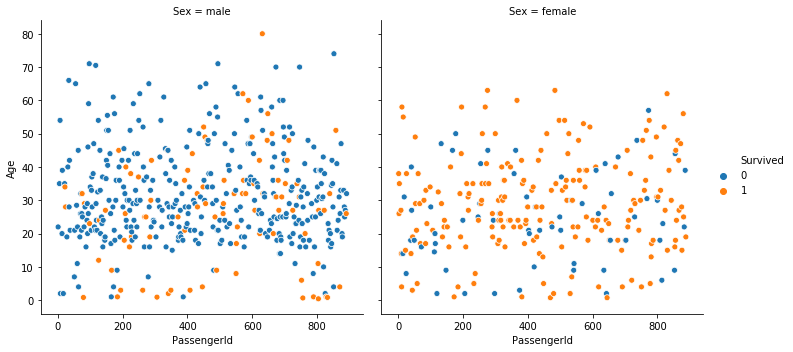

In [7]:
# Here I'm analyzing 'Sex' and survival rate
# As we can clearly see, Women of all ages had a much higher survival rate than men
# This is obvious since women and children were given priority in boarding life-boats

sns.relplot(x='PassengerId', y='Age', hue='Survived', col='Sex', data=data)

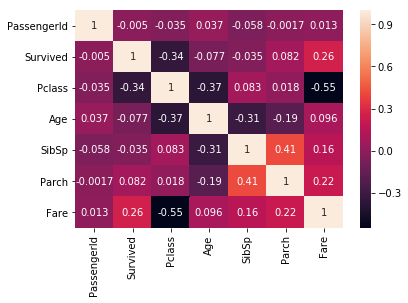

In [8]:
# We can check for correlations between the features (numerical) by using a annotated heat map of the correlation matrix
# As we can see, no obvious correlations stand out apart from 'Fare' and 'Pclass'

corr = data.corr()
sns.heatmap(corr, annot=True)

## Dealing with missing values 

In [9]:
# For missing values in the age column, we can substitute either the mean or median (basic)
# For missing values in Embarked, we can substitute the mode
# For missing values in Cabin, well we have roughlu 78% missing values, and thus we'll ignore it

# Checking for most common 'Embarked' port and replacing missing values with that
print(data['Embarked'].value_counts())

data['Embarked'].fillna(value='S', inplace=True)

#checking whether there are still any missing values in 'Embarked' column
data.isnull().sum()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
# Replacing missing age values with mediad

data['Age'].fillna(value=data['Age'].median(), inplace=True)

# Checking whether the missing values have been replaced
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Identifying columns of interest 

In [11]:
# Having dealt with missing values, we now decide what features to consider for building our models
# We would only clean and transfrom features of interest, and discard features which we know don't give much information
# Here I'm discarding these features: ['Name', 'PassengerId', 'Cabin','Ticket']
# Although, intuitively I don't think "Embarked" (the port passengers boarded the ship) has anything to do with survival rate,
# I'm going to leave it ('Embarked') in for now

# Features of interest are target: 'Survived', and predictor features:['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

data.drop(labels=['Name', 'PassengerId', 'Cabin','Ticket', 'Embarked'], axis=1, inplace=True)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## OneHotEncoding Categorical Features 

In [12]:
# One hot encoding is prudent for "Sex" and "Embarked" as there is no inherent order in these features
# The "Pclass" feature is ordinal, so I will leave them as it is for now
# I have used the get_dummies method (Pandas) for one hot encoding

data_cat=pd.get_dummies(data=data[['Pclass','Sex']], drop_first=True)
data_cat.head(5)

,Pclass,Sex_male
0,3,1
1,1,0
2,3,0
3,1,0
4,3,1


In [13]:
# Concatenating the one-hot encoded feature dataframe and the original dataframe

data=pd.concat([data,data_cat], axis=1)

In [14]:
# Subsequently dropping the original categorical features "Sex" and "Embarked"

data.drop(labels=['Sex'], axis=1, inplace=True)
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass,Sex_male
0,0,3,22.0,1,0,7.2500,3,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


## Standardization vs. Normalization of data 

In [15]:
# There is no hard and fast rule when it comes to rescaling data. 
# We can either use Min-Max normalizing or we can use standardization.
# Usually, Min-Max scaling works well when we don't have extreme outliers in the feature of interest.
# In that case standardization works well (transform data to a normal dist. around mean 0 and std. dev. 1). 

In [16]:
# Import both Min-Max Scaler as well as Standard Scaler from sklearn's preprocessing module
# Instantiate an object for these scalers

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms=MinMaxScaler()
ss=StandardScaler()

In [17]:
# Rescaling data and saving the re-scaled data into a new object (numpy array) called 'df_rs'
# Using the fit_transfrom method

df_rs = mms.fit_transform(data)
#df_rs = ss.fit_trans(data)

# Convert the numpy array containing the rescaled features into a dataframe

data_rs = pd.DataFrame(df_rs, columns=list(data.columns))
data_rs.head()

C:\Users\atuls\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass,Sex_male
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0


## Splitting the data into testing and training sets (80-20) 

In [18]:
# Here I'm deliberately not including a validation set, nor I'm doing the widely used k-fold cross validation.
# I've used a simple train-test split of 80%-20%

from sklearn.model_selection import train_test_split

train, test = train_test_split(data_rs, test_size=0.20)

print(data_rs.shape)
print(train.shape)
print(test.shape)

(891, 8)
(712, 8)
(179, 8)


## Separating the target and predictor features 

In [19]:
# separating the target variable "Survived" from both the training and the test sets
# Survived is the 0th index column in the train dataframe, therefore we take it out in our predictor features dataframe
y_train = train['Survived']
y_test = test['Survived']

X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

## Model Selection

#### Choosing the appropriate classification algorithms, then fitting/training the models, and then predicting survival on the test set

In [20]:
# For this exercise, I'm going to select the following 4 classification algorithms

# Naive Bayes Classifier
# Random Forest Classifier
# Logistic Regression Classifier
# Support Vector Machine (SVM) Classifier

from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.svm import SVC as svc

In [33]:
# Instantiate a classifier object 'clf' for the different models
# Hash-out the model not under consideration, and try each model and select the one with the best performance

clf = rfc(n_estimators=200)
#clf = lr()
#clf = gnb()
#clf = svc()

In [34]:
# Fit the model (train the clf object on the training data)
# Predict the target ('survived') on the training set (for now, ultimately the model must do well on the test set)
# Check the accuracy score using the .score method

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
clf.score(X_train, y_train)

0.9817415730337079

## Using Classification metrics for evaluation of the model 

In [35]:
# Here I'm using the classification reports and confusion matrices to evaluate the performance
# We can also use the auc on the roc curve to evaluate models, but given this is a simple exercise, I will do that later

from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# Remember we are still checking the predictive power of the model on the very data it was trained on
# Performance on the test set matters, not training set.
# However, if the model doesn't do well on the test set, despite doing well on training set, we have over-fitting

print(classification_report(y_train, y_train_pred))
print()
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       445
         1.0       0.98      0.97      0.98       267

   micro avg       0.98      0.98      0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712


[[439   6]
 [  7 260]]


In [37]:
# Now let's predict "Survived" on the test set, and print out the score
# As you can see, the accuracy score is significantly lower in the test set

y_test_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8379888268156425

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       104
         1.0       0.85      0.75      0.79        75

   micro avg       0.84      0.84      0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


[[94 10]
 [19 56]]


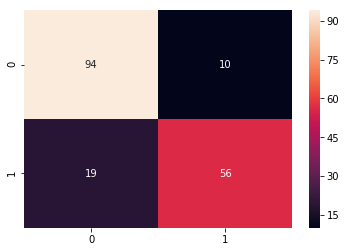

In [38]:
# Here, I'm printing out the metrics to evaluate performance of each model (by hashing-out the ones not in consideration)
# Random Forest model does the best job here among the models I tried (accuracy score above 85%)
# This gives a hint that the decision boundary isn't linear (SVC and Log. Reg. don't do a good job)

print(classification_report(y_test, y_test_pred))
print()
print(confusion_matrix(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)